In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the USArrests dataset
data = pd.read_csv("/Users/maram/Downloads/USArrests.csv")
data.head(10)
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


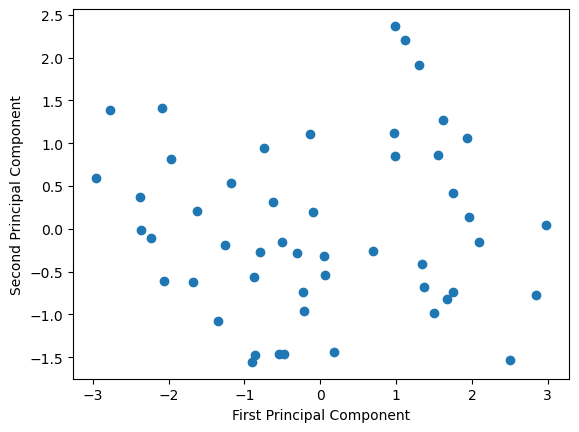

In [15]:
# Standardize the data
scaled_data = (data.iloc[:, 1:] - data.iloc[:, 1:].mean()) / data.iloc[:, 1:].std()

# Calculate the covariance matrix
cov_matrix = np.cov(scaled_data.T)

# Calculate the eigenvectors and eigenvalues
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

# Sort the eigenvectors by descending eigenvalues
sorted_indices = np.argsort(eig_vals)[::-1]
sorted_eigvals = eig_vals[sorted_indices]
sorted_eigvecs = eig_vecs[:, sorted_indices]

# Project the data onto the first two principal components
pca_result = np.dot(scaled_data, sorted_eigvecs[:, :2])

# Visualize the PCA
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.show()


In [17]:


# Standardize the data
scaled_data = (data.iloc[:, 1:] - data.iloc[:, 1:].mean()) / data.iloc[:, 1:].std()

def kmeans(data, k, max_iterations=100):
    def initialize_centroids(data, k):
        centroids = data.sample(k).to_numpy()
        return centroids

    def assign_clusters(data, centroids):
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        cluster_assignments = np.argmin(distances, axis=1)
        return cluster_assignments

    def update_centroids(data, cluster_assignments, k):
        new_centroids = np.array([data[cluster_assignments == i].mean(axis=0) for i in range(k)])
        return new_centroids

    centroids = initialize_centroids(data, k)
    prev_centroids = None

    for _ in range(max_iterations):
        cluster_assignments = assign_clusters(data.to_numpy(), centroids)
        prev_centroids = centroids.copy()
        centroids = update_centroids(data.to_numpy(), cluster_assignments, k)

        if np.allclose(centroids, prev_centroids):
            break

    return cluster_assignments, centroids

# Perform k-means clustering
k = 4
cluster_assignments, centroids = kmeans(scaled_data, k)


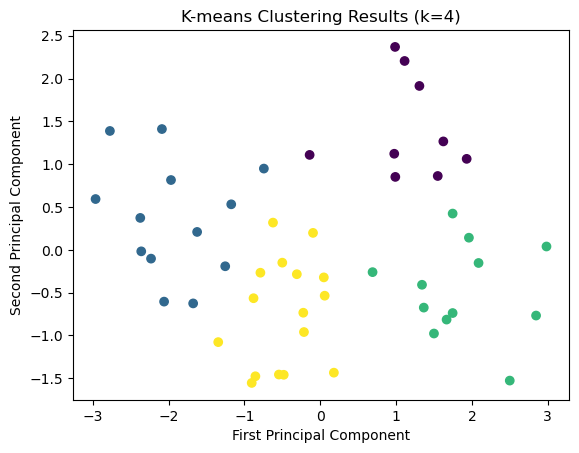

In [23]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load USArrests dataset
url = "https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/USArrests.csv"
data = pd.read_csv(url)

# Standardize the data
scaled_data = (data.iloc[:, 1:] - data.iloc[:, 1:].mean()) / data.iloc[:, 1:].std()

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Perform k-means clustering with the chosen k
chosen_k = 4  # Based on the elbow method
cluster_assignments, centroids = kmeans(scaled_data, chosen_k)

# Visualize the k-means clustering results
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_assignments, cmap='viridis')
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title("K-means Clustering Results (k=4)")
plt.show()


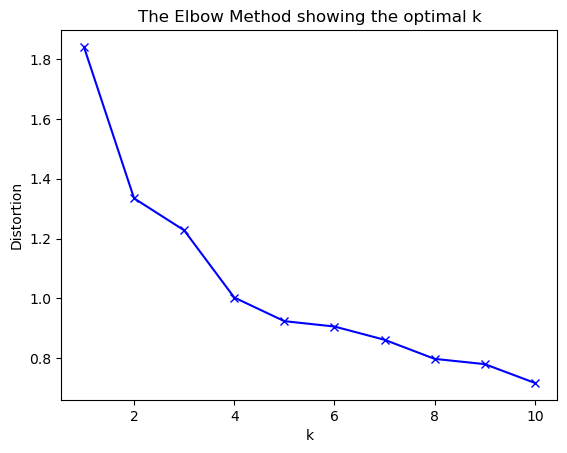

In [22]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

# Load USArrests dataset
url = "https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/USArrests.csv"
data = pd.read_csv(url)

# Standardize the data
scaled_data = (data.iloc[:, 1:] - data.iloc[:, 1:].mean()) / data.iloc[:, 1:].std()

def kmeans(data, k, max_iterations=100):
    def initialize_centroids(data, k):
        centroids = data.sample(k).to_numpy()
        return centroids

    def assign_clusters(data, centroids):
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        cluster_assignments = np.argmin(distances, axis=1)
        return cluster_assignments

    def update_centroids(data, cluster_assignments, k):
        new_centroids = np.array([data[cluster_assignments == i].mean(axis=0) for i in range(k)])
        return new_centroids

    centroids = initialize_centroids(data, k)
    prev_centroids = None

    for _ in range(max_iterations):
        cluster_assignments = assign_clusters(data.to_numpy(), centroids)
        prev_centroids = centroids.copy()
        centroids = update_centroids(data.to_numpy(), cluster_assignments, k)

        if np.allclose(centroids, prev_centroids):
            break

    return cluster_assignments, centroids

def elbow_method(data, max_k=10):
    distortions = []
    K = range(1, max_k + 1)
    
    for k in K:
        _, centroids = kmeans(data, k)
        distortions.append(sum(np.min(np.linalg.norm(data.to_numpy()[:, np.newaxis] - centroids, axis=2), axis=1)) / data.shape[0])

    return K, distortions

# Determine the optimal number of clusters (k) using the elbow method
K, distortions = elbow_method(scaled_data)
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Perform k-means clustering with the chosen k
chosen_k = 4  # Based on the elbow method
cluster_assignments, centroids = kmeans(scaled_data, chosen_k)


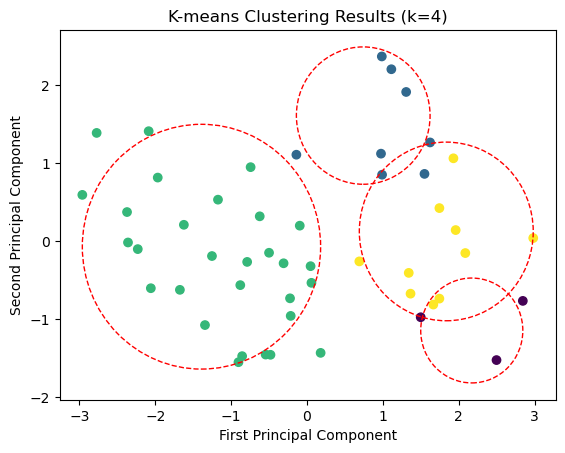

In [26]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib.patches import Circle

# Load USArrests dataset
url = "https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/USArrests.csv"
data = pd.read_csv(url)

# Standardize the data
scaled_data = (data.iloc[:, 1:] - data.iloc[:, 1:].mean()) / data.iloc[:, 1:].std()

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Perform k-means clustering with the chosen k
chosen_k = 4  # Based on the elbow method
cluster_assignments, centroids = kmeans(scaled_data, chosen_k)

# Visualize the k-means clustering results
fig, ax = plt.subplots()
scatter = ax.scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_assignments, cmap='viridis')
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title("K-means Clustering Results (k=4)")

# Draw circles around clusters
for i in range(chosen_k):
    cluster_points = pca_result[cluster_assignments == i]
    min_x, max_x = np.min(cluster_points[:, 0]), np.max(cluster_points[:, 0])
    min_y, max_y = np.min(cluster_points[:, 1]), np.max(cluster_points[:, 1])
    center_x, center_y = (min_x + max_x) / 2, (min_y + max_y) / 2
    radius = max(max_x - center_x, max_y - center_y)
    circle = plt.Circle((center_x, center_y), radius, color='r', fill=False, linestyle='--')
    ax.add_patch(circle)

plt.show()
